In [13]:
from diffusers import PixArtAlphaPipeline
import torch
from diffusers import Transformer2DModel
from PIL import Image
import os
from transformers import T5Tokenizer

In [2]:
# for comparison

orig_pipe = pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-XL-2-512x512", torch_dtype=torch.float16)
orig_pipe = orig_pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing PixArtTransformer2DModel: 
 ['caption_projection.y_embedding']


In [5]:
transformer = Transformer2DModel.from_pretrained("/workspace/PixArt-alpha/output/diffusers_trained/transformer", torch_dtype=torch.float16)
pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-XL-2-512x512", torch_dtype=torch.float16, transformer=transformer)
pipe = pipe.to("cuda")

OSError: We couldn't connect to 'https://huggingface.co' to load this model, couldn't find it in the cached files and it looks like /workspace/PixArt-alpha/output/diffusers_trained/transformer is not the path to a directory containing a config.json file.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/diffusers/installation#offline-mode'.

  0%|          | 0/20 [00:00<?, ?it/s]

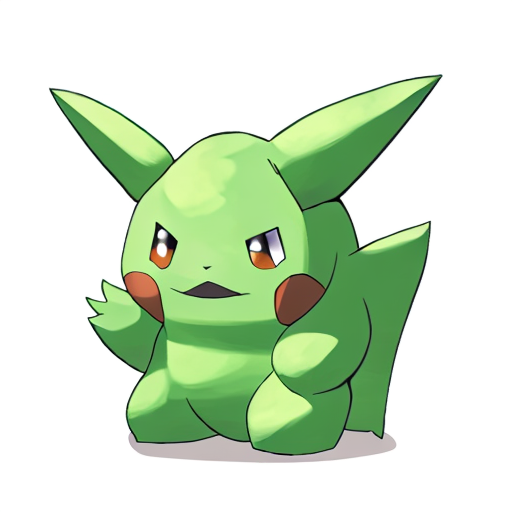

In [22]:
prompt = "A green pokemon on white background"
image = pipe(prompt=prompt).images[0]
image

In [3]:
def generate_and_save_images(prompts, pipe, output_dir):
    """
    Generate and save images based on a list of prompts using a pretrained model.

    Args:
        prompts (list of str): List of prompts to generate images.
        pipe: The pretrained model pipeline (e.g., from diffusers).
        output_dir (str): Directory to save the generated images.

    Returns:
        None
    """
    import os
    os.makedirs(output_dir, exist_ok=True)
    
    for idx, prompt in enumerate(prompts, start=1):
        # Generate the image
        image = pipe(prompt=prompt).images[0]
        
        # Create a valid filename from the prompt with numbering
        filename_base = "".join(c if c.isalnum() else "_" for c in prompt)
        filename = f"{filename_base}_{idx:06d}.png"
        filepath = os.path.join(output_dir, filename)
        
        # Save the image
        image.save(filepath)
        print(f"Image saved: {filepath}")


In [7]:
prompts = [
            "triangle is to the upper left of square", 
            "blue triangle is to the upper left of red square", 
            "triangle is above and to the right of square", 
            "blue circle is above and to the right of blue square", 
            "triangle is to the left of square", 
            "triangle is to the left of triangle", 
            "circle is below red square",
            "red circle is to the left of blue square",
            "blue square is to the right of red circle",
            "red circle is above square",
            "triangle is above red circle",
            "blue triangle is above red triangle", 
            "blue circle is above blue square", 
        ]
output_dir = "../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt"
generate_and_save_images(prompts, orig_pipe, output_dir)


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/triangle_is_to_the_upper_left_of_square_000001.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/blue_triangle_is_to_the_upper_left_of_red_square_000002.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/triangle_is_above_and_to_the_right_of_square_000003.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/blue_circle_is_above_and_to_the_right_of_blue_square_000004.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/triangle_is_to_the_left_of_square_000005.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/triangle_is_to_the_left_of_triangle_000006.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/circle_is_below_red_square_000007.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/red_circle_is_to_the_left_of_blue_square_000008.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/blue_square_is_to_the_right_of_red_circle_000009.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/red_circle_is_above_square_000010.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/triangle_is_above_red_circle_000011.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/blue_triangle_is_above_red_triangle_000012.png


  0%|          | 0/20 [00:00<?, ?it/s]

Image saved: ../../T2I-CompBench-main/examples/samples/PixArt-XL-2-512x512_ourprompt/blue_circle_is_above_blue_square_000013.png


### Examine text encoder

In [11]:
# Access the T5 encoder
t5_encoder = orig_pipe.text_encoder

# Print or inspect the T5 encoder
print(t5_encoder)

T5EncoderModel(
  (shared): Embedding(32128, 4096)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 4096)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=4096, out_features=4096, bias=False)
              (k): Linear(in_features=4096, out_features=4096, bias=False)
              (v): Linear(in_features=4096, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=4096, bias=False)
              (relative_attention_bias): Embedding(32, 64)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=4096, out_features=10240, bias=False)
              (wi_1): Linear(in_features=4096, out_features=10240, bias=False)
              (wo

In [12]:
print(t5_encoder.config)


T5Config {
  "_name_or_path": "/n/netscratch/konkle_lab/Everyone/Jingxuan/huggingface/hub/models--PixArt-alpha--PixArt-XL-2-512x512/snapshots/50f702106901db6d0f8b67eb88e814c56ded2692/text_encoder",
  "architectures": [
    "T5EncoderModel"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 10240,
  "d_kv": 64,
  "d_model": 4096,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "num_decoder_layers": 24,
  "num_heads": 64,
  "num_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "tie_word_embeddings": false,
  "torch_dtype": "float16",
  "transformers_version": "4.44.0",
  "use_cache": true,
  "vocab_size": 32128
}



In [17]:
next(t5_encoder.parameters()).device

device(type='cuda', index=0)

In [19]:
# Access the tokenizer
tokenizer = orig_pipe.tokenizer

# Tokenize input text
text = "Triangle is to the upper left of square."
# Tokenize the input text
inputs = tokenizer(text, return_tensors="pt")

# Move all tensors in the inputs dictionary to CUDA
device = "cuda" if torch.cuda.is_available() else "cpu"
inputs = {key: value.to(device) for key, value in inputs.items()}
# Encode using the T5 encoder
encoded_output = t5_encoder(**inputs)

# Inspect the output
print(encoded_output.last_hidden_state.shape)  # Shape: (batch_size, sequence_length, hidden_dim)


torch.Size([1, 10, 4096])


In [ ]:
# Load the pipeline
pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-XL-2-512x512")

In [26]:
# Define a simple manipulation function
def add_constant_to_embedding(embedding, constant=0.2):
    return embedding + constant


def manipulate_token_and_generate(prompt, token_idx, manipulation_fn, pipe, device=None):
    """
    Manipulates a specific token's embedding in a text prompt and generates an image using a PixArt pipeline.

    Args:
        prompt (str): The text prompt for image generation.
        token_to_modify (str): The token in the prompt to manipulate.
        manipulation_fn (callable): A function that takes an embedding and modifies it.
        model_name (str): Name of the pretrained PixArt pipeline model. Default is "PixArt-alpha/PixArt-XL-2-512x512".
        device (str): Device to use ('cuda' or 'cpu'). If None, it auto-detects.

    Returns:
        PIL.Image.Image: The generated image with manipulated embeddings.
    """
   
    # Determine the device
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    pipe.to(device)
    
    # Tokenize the prompt
    inputs = pipe.tokenizer(prompt, return_tensors="pt", padding="max_length", max_length=pipe.tokenizer.model_max_length).to(device)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]
    
    # Get text embeddings
    text_embeddings = pipe.text_encoder(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
    
    # Decode tokens for reference
    decoded_tokens = pipe.tokenizer.convert_ids_to_tokens(input_ids[0])
    print(f"Decoded Tokens: {decoded_tokens}")
    
    
    # Manipulate the embedding for the specified token
    manipulated_embeddings = text_embeddings.clone()
    manipulated_embeddings[0, token_idx, :] = manipulation_fn(manipulated_embeddings[0, token_idx, :])
    
    # Pass manipulated embeddings into the pipeline
    generated_image = pipe(prompt_embeds=manipulated_embeddings, prompt_attention_mask=attention_mask).images[0]
    
    return generated_image


Decoded Tokens: ['▁Triangle', '▁is', '▁to', '▁the', '▁upper', '▁left', '▁of', '▁square', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<p

  0%|          | 0/20 [00:00<?, ?it/s]

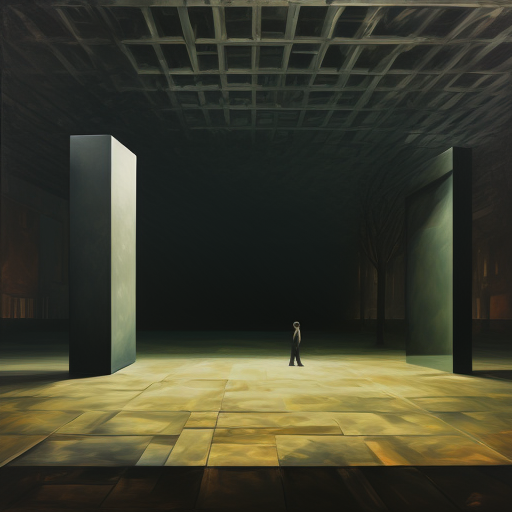

In [27]:
# manipulate Triangle
image_0 = manipulate_token_and_generate(prompt, 0, lambda embedding: add_constant_to_embedding(embedding,constant=0.2), pipe, device=None)
image_0

Decoded Tokens: ['▁Triangle', '▁is', '▁to', '▁the', '▁upper', '▁left', '▁of', '▁square', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<p

  0%|          | 0/20 [00:00<?, ?it/s]

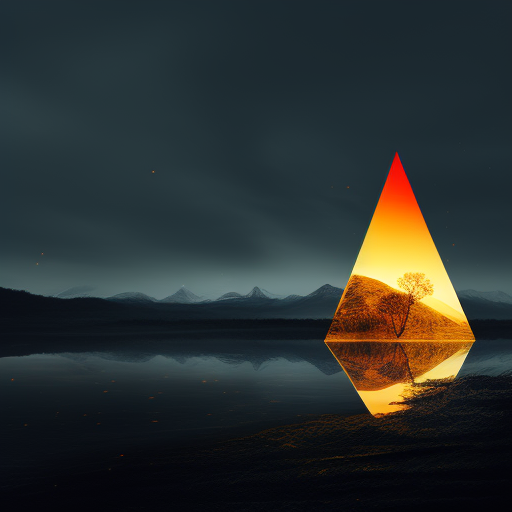

In [28]:
# manipulate Triangle
image_1 = manipulate_token_and_generate(prompt, 7, lambda embedding: add_constant_to_embedding(embedding,constant=0.2), pipe, device=None)
image_1

Decoded Tokens: ['▁Triangle', '▁is', '▁to', '▁the', '▁upper', '▁left', '▁of', '▁square', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<p

  0%|          | 0/20 [00:00<?, ?it/s]

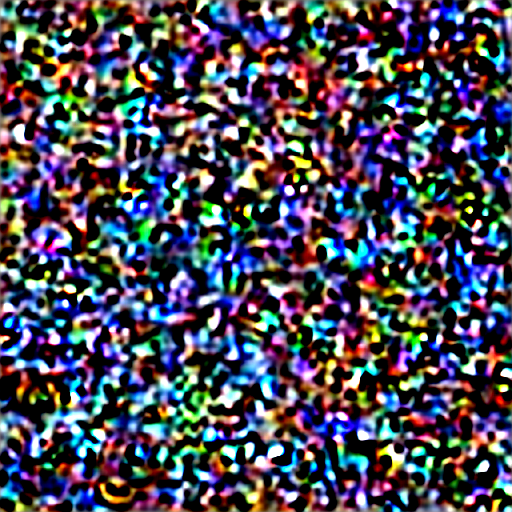

In [29]:
# manipulate Triangle
image_2 = manipulate_token_and_generate(prompt, 8, lambda embedding: add_constant_to_embedding(embedding,constant=0.2), pipe, device=None)
image_2